<div class="alert alert-block alert-danger">
<H1>
IBM MACHINE LEARNING CERTIFICATION: EXPLORATORY DATA ANALYSIS (EDA)
</H1></div>

<span style='color:Indigo'>**Course Link: https://www.coursera.org/learn/supervised-machine-learning-classification**</span>

<div class="alert alert-block alert-info">
<H2>
EDA: SUPERVISED CLASSIFICATION MODELS FOR EMPLOYEE ATTRITION
</H2></div>

<div class="alert alert-block alert-success">
<H3>
Fatima, Sayeda
</H3></div>

<div class="alert alert-block alert-warning">
<H4>    
<span style='color:Indigo'> Import Libraries </span>
</H4></div>

In [1]:
#!pip install --upgrade pip
#!pip install skillsnetwork 
#import skillsnetwork

#piplite
import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
print('Module Import Complete')

Module Import Complete


In [2]:
## Import packages here
import warnings
import pandas as pd
import numpy as np 
import imblearn
import sweetviz as sv # For Automated Exploratory Data Analysis

from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.inspection import permutation_importance


from termcolor import colored     # To Display Colored Terminal Output

from datetime import date
from datetime import datetime


<div class="alert alert-block alert-danger">
<H4>
Get Script Start Time
</H4></div>

In [3]:
script_start_time = datetime.now()
print(script_start_time)

2022-09-01 09:05:21.882168


<div class="alert alert-block alert-success">
<H4>
3a) Data Exploration
</H4></div>

<div class="alert alert-block alert-warning">
<H4>
Ignore Warnings & Random Seed Provision
</H4></div>

In [4]:
warnings.filterwarnings('ignore') # import warnings

In [5]:
rs = 123

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'>Load & Read Dataset</span>
</H4></div>

In [6]:
# Load the dataset
url = ("C:/Users/fatima.s/Documents/PythonScripts/DATA SCIENCE/IBM Machine Learning Intermediate/MODULE 3 SUPERVISED MACHINE LEARNING/DATA/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(url, index_col=False) # keep_default_na = False # na_filter=False,
df.head(100)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'>Check data set column types</span>
</H4></div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Perform quick EDA: </span>
    To see dataset’s distribution and its dispersion.
</H4></div>

In [8]:
df_eda = sv.analyze(df) # Use Sweetviz for Automated EDA
df_eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Compute Descriptive Statistics: </span>
    To summarize shape of a dataset’s distribution, its dispersion and central tendency.
</H4></div>

In [9]:
#To get description of all columns
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<div class="alert alert-block alert-success">
<H4>
3b) Data Cleansing Actions
</H4></div>

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Drop Columns if 90% data is empty </span>
</H4></div>

drop_thresh = df.shape[0]*.10 <br>
df = df.loc[:, df.isin([' ','NULL','Nan',0]).mean() < drop_thresh] <br>
df = df.dropna(thresh=drop_thresh, how='all', axis='columns').copy() <br>
df.info()

In [10]:
print(df.isin([' ','NULL','NaN', 0]).mean())
drop_thresh = .90
df = df.loc[:, df.isin([' ','NULL', 'NaN',0]).mean() < drop_thresh]
print(df.isin([' ','NULL','NaN',0]).mean())

Age                         0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.134014
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
RelationshipSatisfaction    0.000000
StandardHours               0.000000
S

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Handle Missing Values: </span> Replace remaining ["None","nan", "NaN", ""] values with Zero
</H4></div>

In [11]:
df = df.replace(["None","nan", "NaN", ""], "0") # Replace all Nan Values with Zero
null = (df.isin(["None","nan", "NaN", ""]).sum()) # Sum as series
null_df=pd.DataFrame({'cols':null.index, 'sum':null.values}).sort_values(by=['sum'],ascending=False)# Convert series to list

print(colored("Data has ", 'green', attrs=['bold'])
      +colored((null_df.at[0,'sum']), 'red', attrs=['bold']) 
      +colored(" null values.\n ", 'green', attrs=['bold']) 
      +colored(null_df.tail(35), 'red', attrs=['bold'])) # print first two rows

Data has 0 null values.
                         cols  sum
0                        Age    0
26             StandardHours    0
20        NumCompaniesWorked    0
21                    Over18    0
22                  OverTime    0
23         PercentSalaryHike    0
24         PerformanceRating    0
25  RelationshipSatisfaction    0
27          StockOptionLevel    0
18             MonthlyIncome    0
28         TotalWorkingYears    0
29     TrainingTimesLastYear    0
30           WorkLifeBalance    0
31            YearsAtCompany    0
32        YearsInCurrentRole    0
33   YearsSinceLastPromotion    0
19               MonthlyRate    0
17             MaritalStatus    0
1                  Attrition    0
8              EmployeeCount    0
2             BusinessTravel    0
3                  DailyRate    0
4                 Department    0
5           DistanceFromHome    0
6                  Education    0
7             EducationField    0
9             EmployeeNumber    0
16           JobSatisfa

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Drop Duplicates </span>
</H4></div>

In [12]:
#Drop Duplicate Rows
df = df.drop_duplicates()

<div class="alert alert-block alert-success">
<H4>
4) Features Engineering
</H4></div>

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 1) Assessing Columns for Feature Selection: <br><br></span>
    Get unique counts to determine threshold for dropping columns <br>
    Drop Columns from dataframe if uniqueness is less than threshold (eg. 2)
</H4></div>

In [13]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns], # get unique counts
                          columns=['Column_Name', 'Unique']).sort_values(by=['Unique'])
print(colored("\nThis can help us determine threshold for which columns to exclude from Features.\n\n ", 'blue', attrs=['bold'])
      + colored(type(unique_counts), 'green', attrs=['bold'])
      + colored("\n\n", 'green', attrs=['bold'])
      + colored(unique_counts, 'red', attrs=['bold'])
     )

unique = unique_counts[(unique_counts['Unique'] < 2)] #If threshold is lesss than 2 then 
drop_unique = (unique['Column_Name'].tolist()) # list of columns to drop

cols_to_exclude = ['EmployeeNumber']
cols_to_exclude = ['EmployeeNumber'] + drop_unique

print(colored("\n\n ", 'blue', attrs=['bold'])
      + colored(type(unique), 'green', attrs=['bold'])
      + colored("\n", 'green', attrs=['bold'])
      + colored(unique, 'red', attrs=['bold'])
      
      + colored("\n\nList of columns to drop\n", 'blue', attrs=['bold'])
      + colored(cols_to_exclude , 'red', attrs=['bold'])
     )

#Function to Drop Columns & Convert to Categories
for col in df.columns:        
    if col in cols_to_exclude:
        df = df.loc[:, ~df.columns.isin(cols_to_exclude)]
df.info()


This can help us determine threshold for which columns to exclude from Features.

 <class 'pandas.core.frame.DataFrame'>

                 Column_Name  Unique
21                    Over18       1
26             StandardHours       1
8              EmployeeCount       1
11                    Gender       2
1                  Attrition       2
24         PerformanceRating       2
22                  OverTime       2
17             MaritalStatus       3
4                 Department       3
2             BusinessTravel       3
27          StockOptionLevel       4
10   EnvironmentSatisfaction       4
13            JobInvolvement       4
16           JobSatisfaction       4
25  RelationshipSatisfaction       4
30           WorkLifeBalance       4
6                  Education       5
14                  JobLevel       5
7             EducationField       6
29     TrainingTimesLastYear       7
15                   JobRole       9
20        NumCompaniesWorked      10
23         PercentSalaryHi

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 2) Data Encoding of Object/String Columns: </span> <br><br>
    * List all Object/String Columns <br>
    * Deep copy the original data <br>
    * Create Function to employ Scikit-learn label encoding to encode object data<br>
    * Create a new dataframe with encoded data description to attach to model outcomes
</H4></div>

In [14]:
#Function to encode object/string columns

#List all Object/String Columns
from sklearn import preprocessing
cat_columns = df.select_dtypes(include=[object]) # Get Object Type Columns to Convert to Encoded Categories 
#cat_columns.info()

categorical_column = list(cat_columns.columns)# list of columns to for label encoding

print(colored("\n\nColumns Requiring Encoding: \n", 'blue', attrs=['bold'])
              + colored(categorical_column, 'green', attrs=['bold']))

#Deep copy the original data
df_encoded = df.copy(deep=True)

# Make Empty Dataframe to decode encoded data later
decode_features = pd.DataFrame()

##### Employ Scikit-learn label encoding to encode object data #####
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df_encoded[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        
        ##### Decode Encoded Data #####
        feature_df = pd.DataFrame([le_name_mapping])
        feature_df = feature_df.astype(str)
        print(feature_df)
        feature_df= (col + "_" + feature_df.iloc[0:])
        feature_df["Feature"] = col
        print(feature_df)
        decode_features = decode_features.append(feature_df)# Append Dictionaries to Empty Dataframe for later Decoding

        ##### Print Encoded Data #####
        print(colored("Feature: \n", 'blue', attrs=['bold'])
              + colored(col, 'red', attrs=['bold'])
              + colored("\nMapping: \n", 'blue', attrs=['bold'])
              + colored(le_name_mapping, 'green', attrs=['bold'])
              + colored("\n\n", 'blue', attrs=['bold'])
             )           
df_encoded.head(3)

##### Make Decoded Factor Dataframe with Description #####
#print(decode_features)
factor_list = decode_features.T # Transpose Dataframe and place in new dataframe
factor_list = factor_list.replace(np.nan, "/") # nan values with forward slash
factor_list["Factors"] = factor_list.astype(str).agg("".join,axis=1).replace(r'[^\w\s]|/', '', regex=True) # Aggregate All Columns so that all features scattered in multiple columns are copied into a single column and replace forward slash
factor_list.reset_index() # Reset index before copying/assigning it to a new column
factor_list['Description'] = factor_list.index  # Assign index to column
print(factor_list)



Columns Requiring Encoding: 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
  No Yes
0  0   1
            No          Yes    Feature
0  Attrition_0  Attrition_1  Attrition
Feature: 
Attrition
Mapping: 
{'No': 0, 'Yes': 1}


  Non-Travel Travel_Frequently Travel_Rarely
0          0                 1             2
         Non-Travel Travel_Frequently     Travel_Rarely         Feature
0  BusinessTravel_0  BusinessTravel_1  BusinessTravel_2  BusinessTravel
Feature: 
BusinessTravel
Mapping: 
{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


  Human Resources Research & Development Sales
0               0                      1     2
  Human Resources Research & Development         Sales     Feature
0    Department_0           Department_1  Department_2  Department
Feature: 
Department
Mapping: 
{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


  Human Resources Life Sciences Marketing Medical

<div class="alert alert-block alert-info">
<H3>
Pre-processing:  Feature selection/extraction
</H3></div>

<div class="alert alert-block alert-warning">
<H5>
Let's compute correlation to understand data features better:<br><br>
</H5></div>

In [15]:
from scipy.stats import pearsonr
#Supervised Filteration Technique using #Pearson's Correlation to filter positive correlations with target variable 'Attrition'
correlation_threshold = 0
target_col_name = 'Attrition'
feature_target_corr = {}
for col in df_encoded:
    if target_col_name != col:
        #feature_target_corr[col + ' to ' + target_col_name] = \
        feature_target_corr[col] = \
            pearsonr(df_encoded[col], df_encoded[target_col_name])[0]
correlation = pd.DataFrame(feature_target_corr.items(), columns=['Features1', 'Corr']).sort_values(by=['Corr'],ascending=False)
correlation = correlation.loc[correlation['Corr'] > correlation_threshold]

#Convert Positively Correlated Features to list
features1 = list(correlation.Features1.unique())


print(colored("\n\nPositive Correlations between Individual Features and Target Variable\n", 'blue', attrs=['bold'])
      + colored(correlation, 'red', attrs=['bold'])
      + colored("\n\nList of Features with Positive Correlations with Target Variable \n", 'blue', attrs=['bold'])
      + colored(features1, 'green', attrs=['bold'])
     )



Positive Correlations between Individual Features and Target Variable
             Features1      Corr
18            OverTime  0.246118
14       MaritalStatus  0.162070
4     DistanceFromHome  0.077924
12             JobRole  0.067151
3           Department  0.063991
17  NumCompaniesWorked  0.043494
8               Gender  0.029453
6       EducationField  0.026846
16         MonthlyRate  0.015170
20   PerformanceRating  0.002889
1       BusinessTravel  0.000074

List of Features with Positive Correlations with Target Variable 
['OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole', 'Department', 'NumCompaniesWorked', 'Gender', 'EducationField', 'MonthlyRate', 'PerformanceRating', 'BusinessTravel']


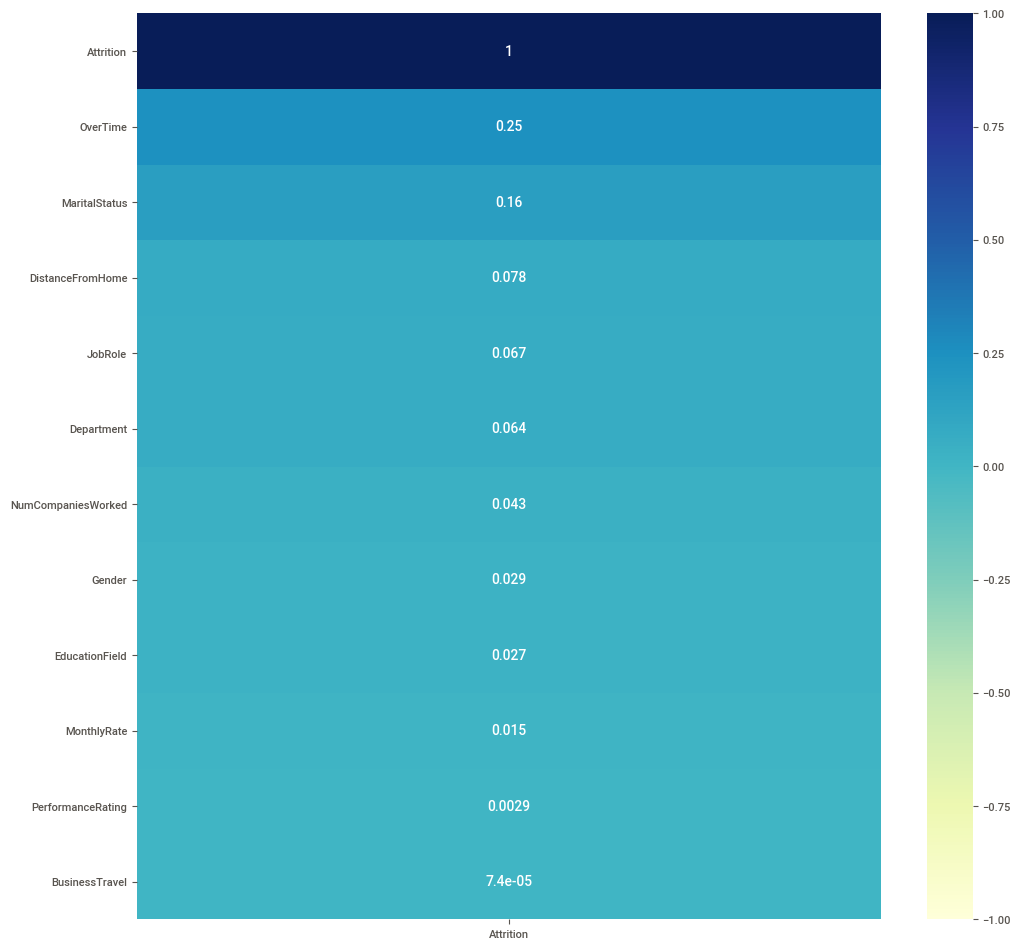

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_encoded.corr()[['Attrition']].sort_values('Attrition').tail(12),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

<div class="alert alert-block alert-warning">
<H5>
Final Feature Selection based on correlation threshold and previous 'features1' list
</H5></div>

In [17]:
#Code Source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
top_n = 30
correlation_threshold = 0.60

def get_feature_correlation(df_encoded, top_n=top_n, corr_method='pearson',
                            remove_duplicates=True, remove_self_correlations=True):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df_encoded.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Features2', 'Features3', 'Correlation_abs']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

#print(get_feature_correlation(df_encoded, 20))
corr = ((get_feature_correlation(df_encoded)))
corr = corr.loc[corr['Correlation_abs'] > correlation_threshold]


features2 = list(corr.Features2.unique())
features3 = list(corr.Features3.unique())
target = ['Attrition']

final_features = np.unique(target + features1 + features2 + features3)

print(colored("\n\nCorrelation Matrix Results for Feature Pairs\n", 'blue', attrs=['bold'])
      + colored(corr, 'red', attrs=['bold'])
      + colored("\n\nList of Final Features \n", 'blue', attrs=['bold'])
      + colored(final_features, 'green', attrs=['bold'])
     )



Correlation Matrix Results for Feature Pairs
               Features2                Features3  Correlation_abs
31         MonthlyIncome                 JobLevel         0.950300
33     TotalWorkingYears                 JobLevel         0.782208
35     PerformanceRating        PercentSalaryHike         0.773550
37     TotalWorkingYears            MonthlyIncome         0.772893
39  YearsWithCurrManager           YearsAtCompany         0.769212
41        YearsAtCompany       YearsInCurrentRole         0.758754
43  YearsWithCurrManager       YearsInCurrentRole         0.714365
45                   Age        TotalWorkingYears         0.680381
47      StockOptionLevel            MaritalStatus         0.662577
49               JobRole               Department         0.662431
51     TotalWorkingYears           YearsAtCompany         0.628133
53        YearsAtCompany  YearsSinceLastPromotion         0.618409

List of Final Features 
['Age' 'Attrition' 'BusinessTravel' 'Department' 'Distanc

In [18]:
df_encoded = df_encoded.filter(final_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int32
 2   BusinessTravel           1470 non-null   int32
 3   Department               1470 non-null   int32
 4   DistanceFromHome         1470 non-null   int64
 5   EducationField           1470 non-null   int32
 6   Gender                   1470 non-null   int32
 7   JobLevel                 1470 non-null   int64
 8   JobRole                  1470 non-null   int32
 9   MaritalStatus            1470 non-null   int32
 10  MonthlyIncome            1470 non-null   int64
 11  MonthlyRate              1470 non-null   int64
 12  NumCompaniesWorked       1470 non-null   int64
 13  OverTime                 1470 non-null   int32
 14  PercentSalaryHike        1470 non-null   int64
 15  Perf

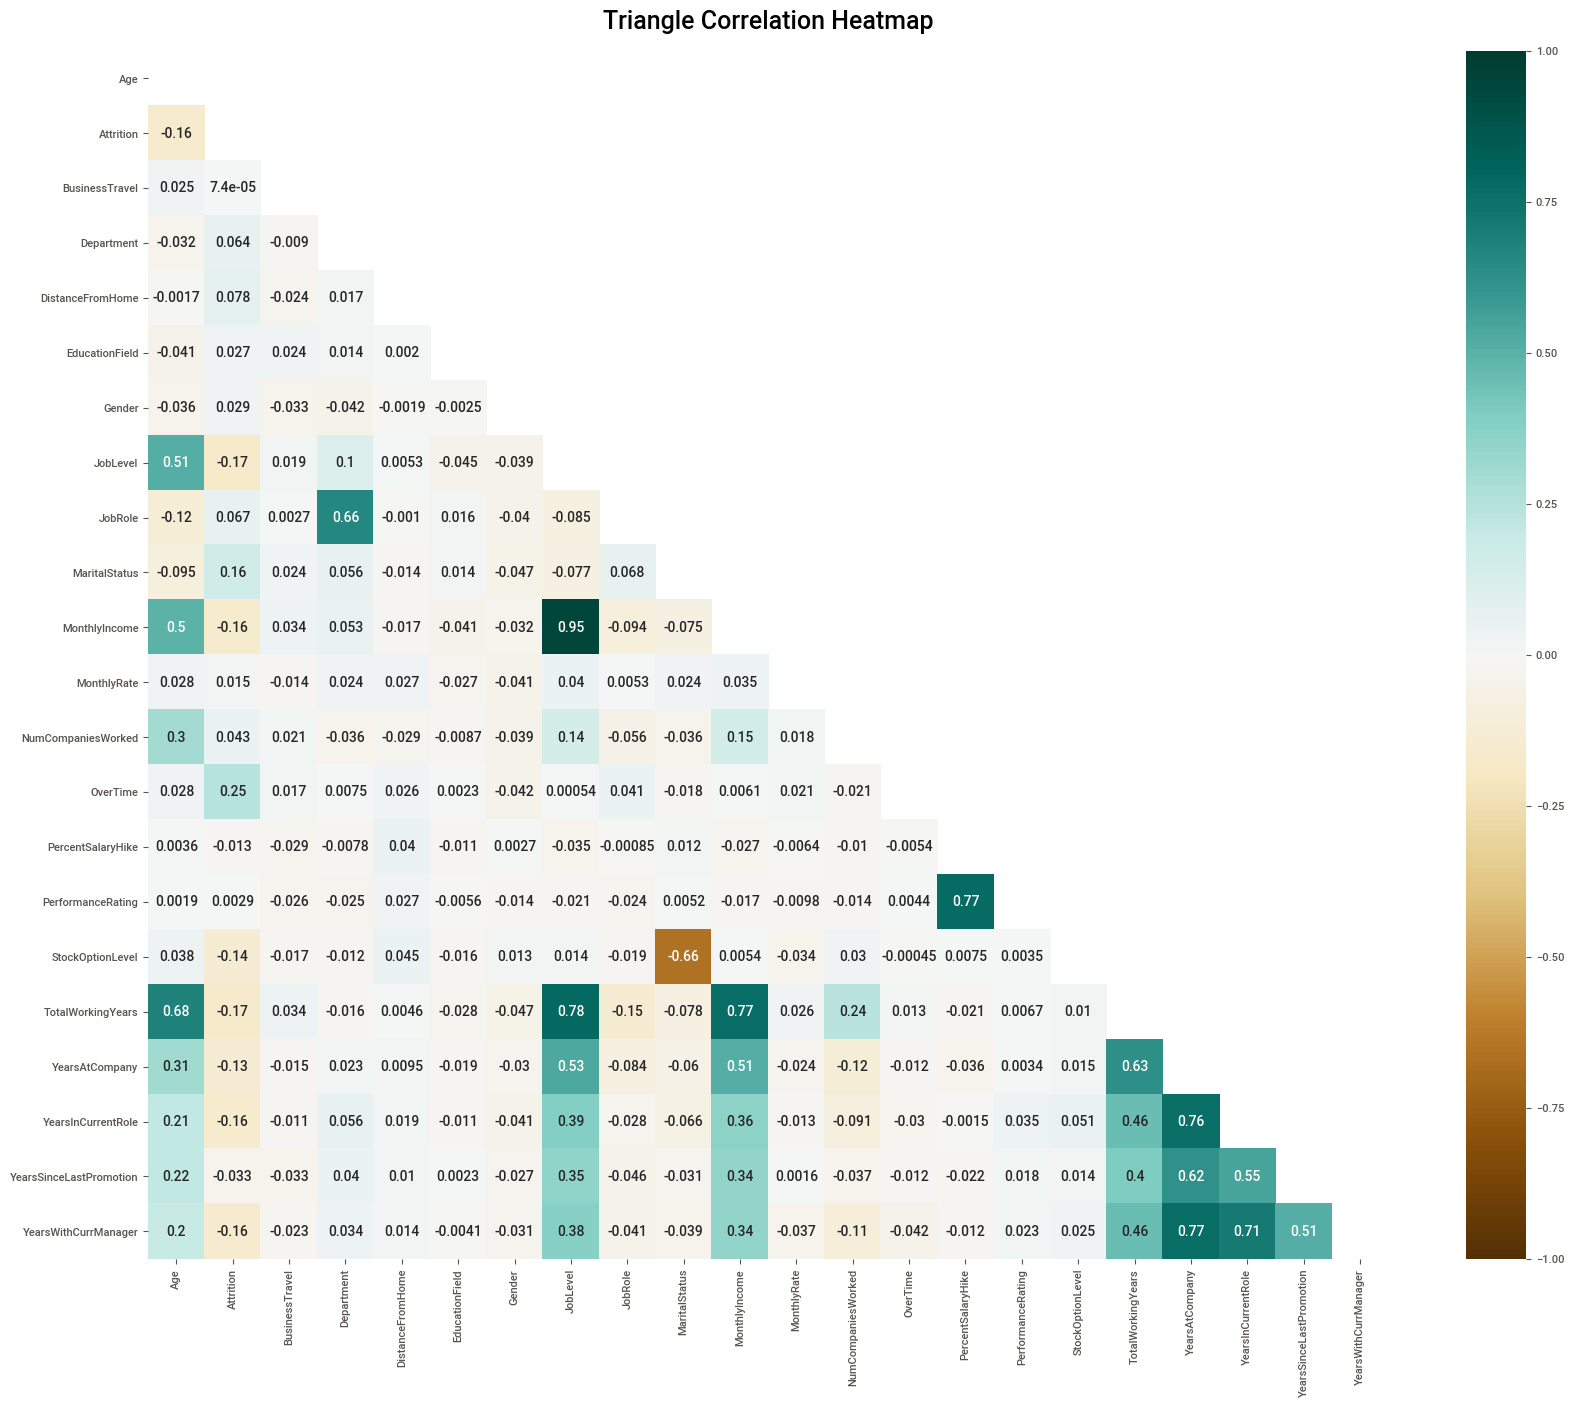

In [19]:
np.triu(np.ones_like(df_encoded.corr()))
plt.figure(figsize=(20, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_encoded.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


<AxesSubplot:>

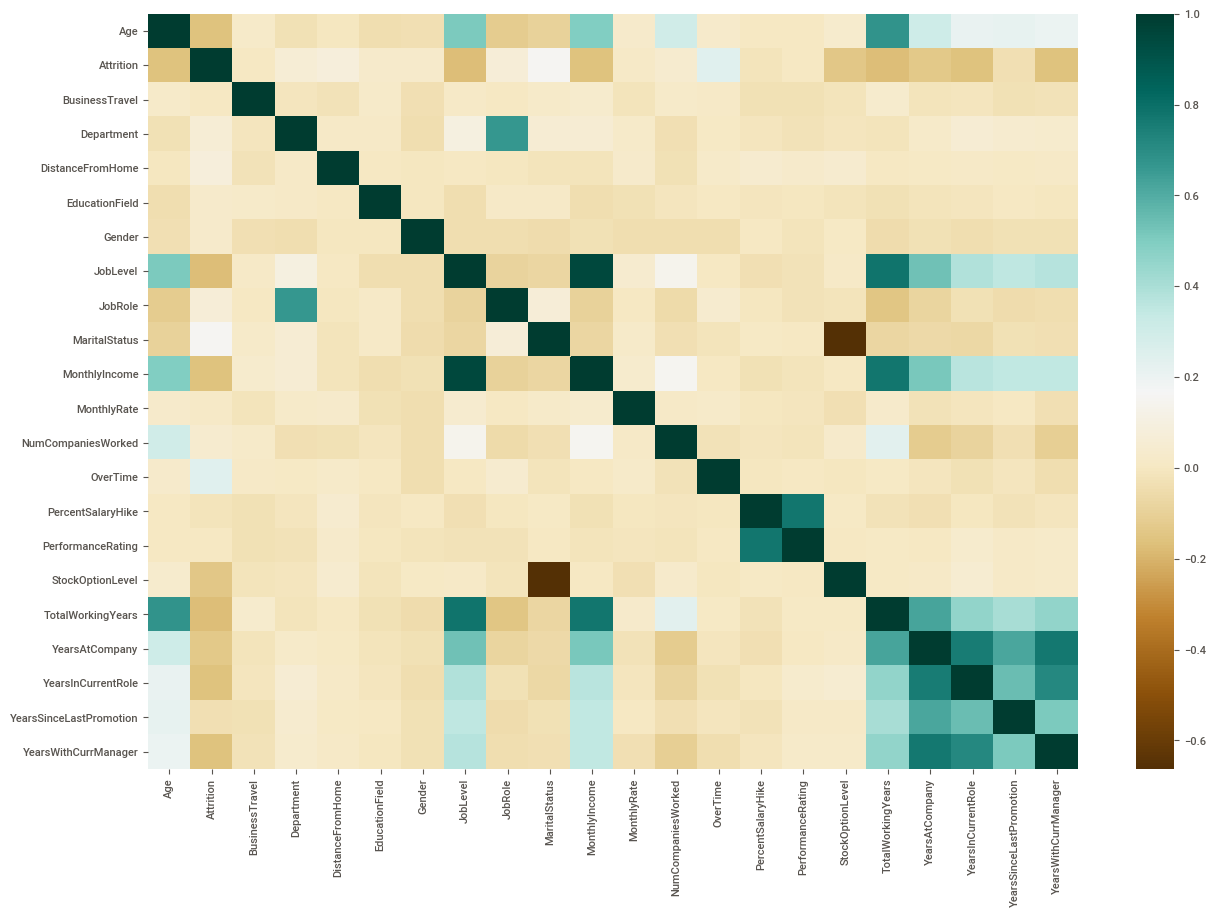

In [20]:
import seaborn as sns
data_correlation = df_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns,cmap='BrBG')

<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Perform quick EDA on Encoded Data: </span>
    To see final features distribution and dispersion.
</H4></div>

In [21]:
# read dataset
df_encoded_eda = sv.analyze(df_encoded)
#df_encoded_eda.show_html()

In [22]:
print(df_encoded.head(3))

   Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0   41          1               2           2                 1   
1   49          0               1           1                 8   
2   37          1               2           1                 2   

   EducationField  Gender  JobLevel  JobRole  MaritalStatus  ...  \
0               1       0         2        7              2  ...   
1               1       1         2        6              1  ...   
2               4       1         1        2              2  ...   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   

   StockOptionLevel  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
0                 0                  8               6                   4   
1        

<div class="alert alert-block alert-danger">
<H2>
Hypothesis Testing
</H2></div>

<div class="alert alert-block alert-warning">
<H3>
Null hypothesis (H_0) is a statistical hypothesis which postulates random factors causing difference in observations.<br>
Alternative hypothesis (H_A) is a statistical hypothesis which postulates real impacts causing difference in observations.
</H3></div>

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing\_3.png)
<div class="alert alert-block alert-warning">
<H3>
Based on the above diagram, the significance level is the decision point for null hypothesis acceptance or vice versa.<br>
This significance level is normally set at 5%, 1% or 0.5%, depending on business requirements. <br>
Hence, given a 5% significance level, alpha($ \alpha) = 0.05 $. <br>
Consequently, for 2-tailed test, alpha should be divided by 2, which will yield 0.025 for alpha set at 0.05. <br>

Serving as an alternative rejection point, the p-value represents the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value serves as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. Hence, a A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.
    
Hence, Null Hypothesis will be Rejected if computed p-value is less than alpha and vice versa.
</H3></div>

<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Determine Significance Tesing Threshold: <br></span>
    a) Set Significance Level alpha (α), that is, the probability below which Null Hypothesis should be rejected. <br>
    b) Formulate Hypothesis <br>
    c) Drive Conclusion
</H4></div>

In [23]:
# Determine Significance Level alpha (α)
alpha=0.05
# Determine Significance Level alpha (α) for Two-Tailed Test
alpha2 = alpha/2

<div class="alert alert-block alert-success">
<H4>
Hypothesis 1: Hypothesizing Gender Differences in Attrition Rates.
</H4></div>
<div class="alert alert-block alert-warning">
    
<H4>
Due to unknown standard deviation, a one-tailed t-test has been used for testing population means between female and male Genders.<br>
Since, it is a one-tailed test, at 5% significance level, 0.05 alpha ($ \alpha)$ has been used. <br>
</H4></div>



6a) Hypothesizing Gender Differences in Attrition Rates:

𝐻_01:𝜇_1−𝜇_2=0  There is No Significant Gender Difference between Employee Attrition of Female and Male Workers.
𝐻_𝐴1:𝜇_1−𝜇_2!=0   There is Significant Gender Difference between Employee Attrition of Female and Male Workers. 

%age Distribution of Gender

      %  Gender
1  60.0       1
0  40.0       0

Value Counts show an imbalanced Class Distribution with 60.0 %  in class 1 and 40.0 %  in class 0

Mean Attrition for Females is: 0.14795918367346939
Mean Attrition for Males is: 0.17006802721088435

t_value1 = -1.1289761152328313
p_value1 = 0.25909236414147996


Conclusion: 
Since p_value 0.25909236414147996 is greater than alpha 0.05
We Accept the Null Hypothesis that there is No Significant Gender Difference between Attrition Rates 
of Female and Male Workers.


<AxesSubplot:xlabel='Attrition', ylabel='Density'>

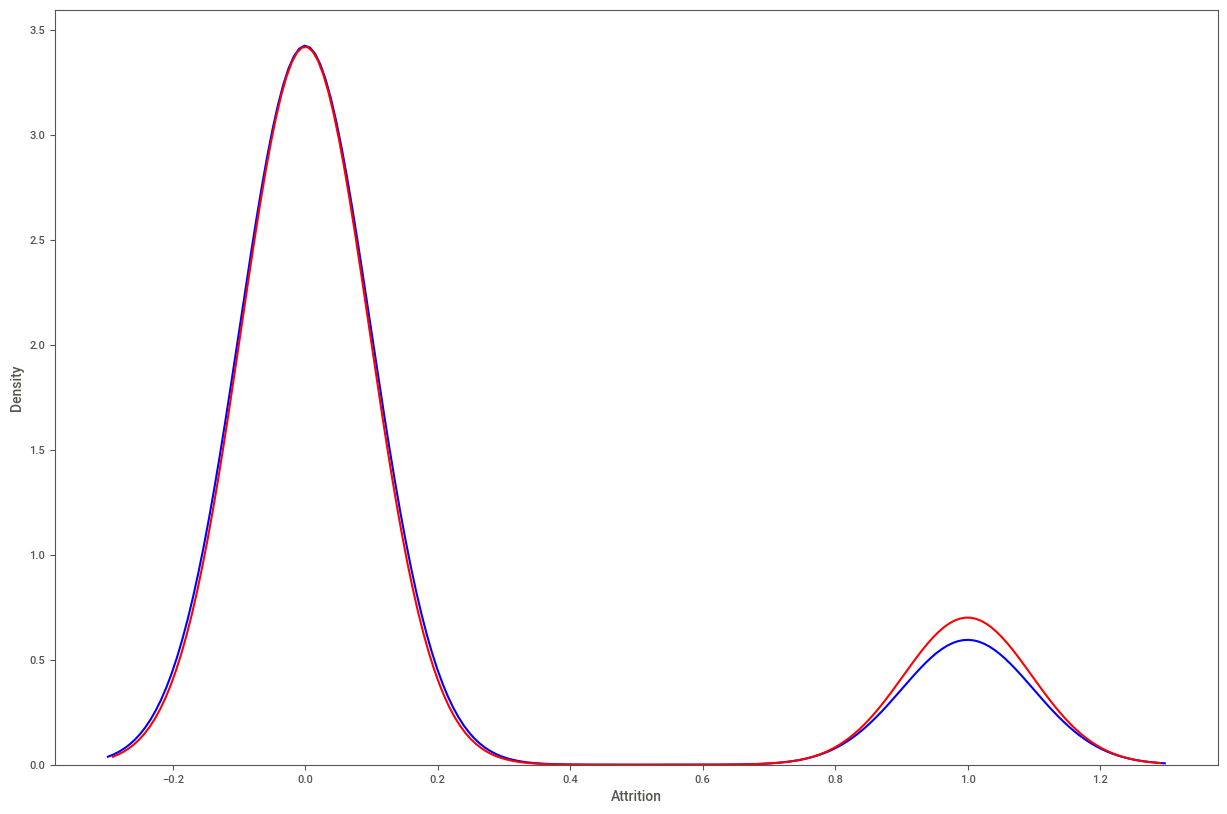

In [24]:
g = df_encoded['Gender'].value_counts()/df_encoded['Gender'].count()*100
g = g.sort_values(ascending=False) # High to Low
g = g.to_frame('%')
g = g.round(2)
g['Gender'] = g.index
print(colored("\n\n6a) Hypothesizing Gender Differences in Attrition Rates:\n", attrs=['bold'])
      + colored("\n𝐻_01:𝜇_1−𝜇_2=0  There is No Significant Gender Difference between Employee Attrition of Female and Male Workers.",'magenta', attrs=['bold'])
      + colored("\n𝐻_𝐴1:𝜇_1−𝜇_2!=0   There is Significant Gender Difference between Employee Attrition of Female and Male Workers. \n",'magenta', attrs=['bold'])

      + colored("\n%age Distribution of Gender\n\n", 'blue', attrs=['bold'])
      + colored(g, 'red', attrs=['bold'])
      + colored("\n\nValue Counts show an imbalanced Class Distribution with ", 'green', attrs=['bold'])
      + colored(g['%'].iloc[0], 'red', attrs=['bold'])
      + colored(" % ", 'red', attrs=['bold'])
      + colored(" in class ", 'blue', attrs=['bold'])
      + colored(g['Gender'].iloc[0], 'red', attrs=['bold'])
      + colored(" and ", 'green', attrs=['bold'])
      + colored(g['%'].iloc[1], 'red', attrs=['bold'])
      + colored(" % ", 'red', attrs=['bold'])
      + colored(" in class ", 'blue', attrs=['bold'])
      + colored(g['Gender'].iloc[1], 'red', attrs=['bold'])
     )
####################
female=df_encoded.loc[df_encoded.Gender==0]
male=df_encoded.loc[df_encoded.Gender==1]

f_att = female.Attrition
m_att = male.Attrition
####################
print(colored("\nMean Attrition for Females is: ", 'blue', attrs=['bold'])
      + colored(female.Attrition.mean(), 'red', attrs=['bold'])
      + colored("\nMean Attrition for Males is: ", 'blue', attrs=['bold'])
      + colored(male.Attrition.mean() , 'red', attrs=['bold'])
     )
####################
t_value1, p_value1 = stats.ttest_ind(f_att, m_att)

print(colored("\nt_value1 = ", 'blue', attrs=['bold'])
      + colored(t_value1, 'red', attrs=['bold'])
      + colored("\np_value1 = ", 'blue', attrs=['bold'])
      + colored(p_value1 , 'red', attrs=['bold'])
     )
####################

if p_value1 <alpha:    
    print(colored("\n\nConclusion: ", attrs=['bold'])
      + colored("\nSince p_value ", 'blue', attrs=['bold'])
      + colored(p_value1, 'red', attrs=['bold'])
      + colored(" is less than alpha ", 'blue', attrs=['bold'])
      + colored(alpha, 'red', attrs=['bold'])
      + colored("\nWe Reject the null hypothesis that there is No Significant Gender Difference between Attrition Rates of Female and Male Workers.", 'magenta',attrs=['bold'])
         )
    
    
else:
    print(colored("\n\nConclusion: ", attrs=['bold'])
      + colored("\nSince p_value ", 'blue', attrs=['bold'])
      + colored(p_value1, 'red', attrs=['bold'])
      + colored(" is greater than alpha ", 'blue', attrs=['bold'])
      + colored(alpha, 'red', attrs=['bold'])
      + colored("\nWe Accept the Null Hypothesis that there is No Significant Gender Difference between Attrition Rates \nof Female and Male Workers.", 'magenta',attrs=['bold'])
         )
####################
sns.distplot(f_att,color='blue',hist=False)
sns.distplot(m_att,color='red',hist=False)

<div class="alert alert-block alert-success">
<H5>
Hypothesis 2: Hypothesizing Differences in Salary Hike between Leavers and Stayers
</H5></div>

<div class="alert alert-block alert-warning">
<H4>
Using Ordinary Least Squares (OLS) model, ANOVA table was formulated to evaluate 'Attrition' group count against 'PercentSalaryHike'. <br><br>
See the following link for more information on OLS: <br>
    <span style='color:Indigo'>https://datajobs.com/data-science-repo/OLS-Regression-[GD-Hutcheson].pdf</span>
</H4></div>

                          df      sum_sq   mean_sq         F  PR(>F)
C(PercentSalaryHike)    14.0    1.805708  0.128979  0.952689  0.5006
Residual              1455.0  196.984088  0.135384       NaN     NaN
0.5005995155055496


6b) Hypothesizing Differences in Salary Hike between Leavers and Stayers:

𝐻_02:𝜇_1−𝜇_2=0  Average Salary Hike of Leavers is Less than or Equal to Stayers.
𝐻_𝐴2:𝜇_1−𝜇_2!=0  Average Salary Hike of Leavers is Greater than or Equal to Stayers.

Summary Statistics

AOV Table Results
                          df      sum_sq   mean_sq         F  PR(>F)
C(PercentSalaryHike)    14.0    1.805708  0.128979  0.952689  0.5006
Residual              1455.0  196.984088  0.135384       NaN     NaN

p_val_sal = 0.5005995155055496


Conclusion: 
Since p_value 0.5005995155055496 is greater than alpha 0.05
We Accept Null Hypothesis that Average Salary Hike of Leavers is Less than or Equal to Stayers.


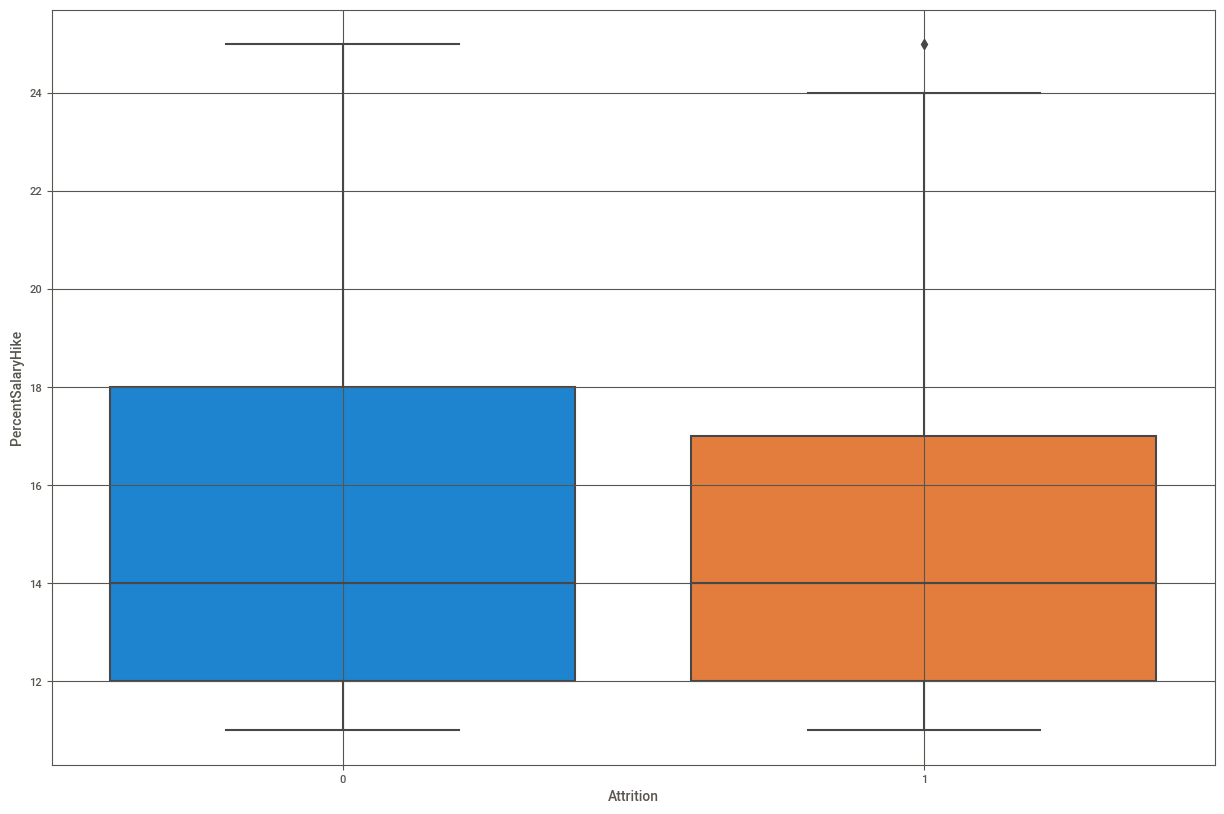

In [25]:
formula = 'Attrition ~ C(PercentSalaryHike)'
model = ols(formula, df_encoded).fit()
aov_table = anova_lm(model)
print(aov_table)
p_val_sal = aov_table.iloc[0,4]
print(p_val_sal)

####################

print(colored("\n\n6b) Hypothesizing Differences in Salary Hike between Leavers and Stayers:\n", attrs=['bold'])
      + colored("\n𝐻_02:𝜇_1−𝜇_2=0  Average Salary Hike of Leavers is Less than or Equal to Stayers.",'magenta', attrs=['bold'])
      + colored("\n𝐻_𝐴2:𝜇_1−𝜇_2!=0  Average Salary Hike of Leavers is Greater than or Equal to Stayers." ,'magenta', attrs=['bold'])
      + colored("\n\nSummary Statistics", attrs=['bold'])
      + colored("\n\nAOV Table Results\n", 'blue', attrs=['bold'])
      + colored(aov_table, 'red', attrs=['bold'])
      
      + colored("\n\np_val_sal = ", 'blue', attrs=['bold'])
      + colored(p_val_sal , 'red', attrs=['bold'])
     )
####################
if p_val_sal <alpha:    
    print(colored("\n\nConclusion: ", attrs=['bold'])
      + colored("\nSince p_value ", 'blue', attrs=['bold'])
      + colored(p_val_sal, 'red', attrs=['bold'])
      + colored(" is less than alpha ", 'blue', attrs=['bold'])
      + colored(alpha, 'red', attrs=['bold'])
      + colored("\nWe Reject Null Hypothesis that Average Salary Hike of Leavers is Less than or Equal to Stayers.", 'magenta',attrs=['bold'])
         )
       
else:
    print(colored("\n\nConclusion: ", attrs=['bold'])
      + colored("\nSince p_value ", 'blue', attrs=['bold'])
      + colored(p_val_sal, 'red', attrs=['bold'])
      + colored(" is greater than alpha ", 'blue', attrs=['bold'])
      + colored(alpha, 'red', attrs=['bold'])
      + colored("\nWe Accept Null Hypothesis that Average Salary Hike of Leavers is Less than or Equal to Stayers.", 'magenta',attrs=['bold'])
         )

sns.boxplot(x="Attrition", y="PercentSalaryHike", data=df_encoded)
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<H5>
Hypothesis 3: Hypothesizing Differences in Attrition Rates between Departments
</H5></div>

<div class="alert alert-block alert-warning">
<H4>
Since the hypothesis is comparing two different categorical variables, that is, attrition/no-attrition and different departments, hence, a chi-squared test was used to ascertain statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table (which is tabulated frequency distribution of categorical data variables).
</H4></div>



6c) Hypothesizing Differences in Attrition Rates between Departments:

𝐻_03:𝜇_1−𝜇_2=0  There is No Significant Difference in Attrition Rate Across Different Departments.
𝐻_𝐴3:𝜇_1−𝜇_2!=0   There is Significant Difference in Attrition Rate Across Different Departments. 

Contigency Table
Attrition     0    1
Department          
0            51   12
1           828  133
2           354   92

Summary Statistics

Mean Attrition for Department 0 is: 0.19047619047619047
Mean Attrition for Department 1 is: 0.1383975026014568
Mean Attrition for Department 2 is: 0.2062780269058296

Chi-Square Statistic: 10.79600732241067
p Value: 0.004525606574479633
Degree of Freedom: 2
Expected Frequencies: [[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]


Conclusion: 
Since p_value 0.004525606574479633 is less than alpha 0.05
We Reject the Null Hypothesis that there is No Significant Difference in Attrition Rate Across Different Departments.


Text(0.5, 1.0, 'Contigency Bar Chart')

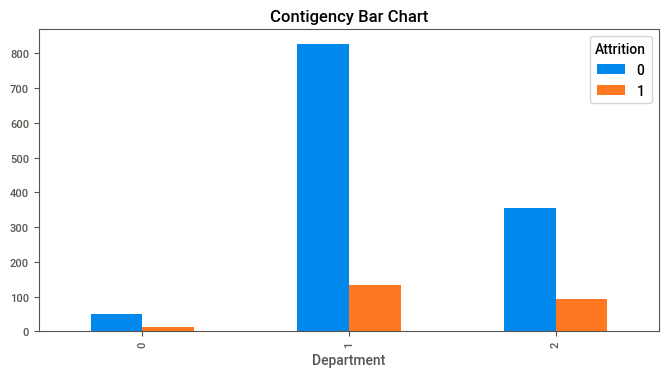

In [26]:
contingency= pd.crosstab(df_encoded.Department, df_encoded.Attrition)

chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)

####################
dept_0=df_encoded.loc[df_encoded.Department==0]
dept_1=df_encoded.loc[df_encoded.Department==1]
dept_2=df_encoded.loc[df_encoded.Department==2]

########################
print(colored("\n\n6c) Hypothesizing Differences in Attrition Rates between Departments:\n", attrs=['bold'])
      + colored("\n𝐻_03:𝜇_1−𝜇_2=0  There is No Significant Difference in Attrition Rate Across Different Departments.",'magenta', attrs=['bold'])
      + colored("\n𝐻_𝐴3:𝜇_1−𝜇_2!=0   There is Significant Difference in Attrition Rate Across Different Departments. \n",'magenta', attrs=['bold'])

      + colored("\nContigency Table", 'green', attrs=['bold'])
      + colored("\n", 'blue', attrs=['bold'])
      + colored(contingency, 'red', attrs=['bold'])
      
      + colored("\n\nSummary Statistics", attrs=['bold'])
      + colored("\n\nMean Attrition for Department 0 is: ", 'blue', attrs=['bold'])
      + colored(dept_0.Attrition.mean(), 'red', attrs=['bold'])
      + colored("\nMean Attrition for Department 1 is: ", 'blue', attrs=['bold'])
      + colored(dept_1.Attrition.mean() , 'red', attrs=['bold'])
      + colored("\nMean Attrition for Department 2 is: ", 'blue', attrs=['bold'])
      + colored(dept_2.Attrition.mean() , 'red', attrs=['bold'])
      
      + colored("\n\nChi-Square Statistic: ", 'blue', attrs=['bold'])
      + colored(chi2, 'red', attrs=['bold'])
      
      + colored("\np Value: ", 'blue', attrs=['bold'])
      + colored(p_val, 'red', attrs=['bold'])
      
      + colored("\nDegree of Freedom: ", 'blue', attrs=['bold'])
      + colored(dof, 'red', attrs=['bold'])
      
      + colored("\nExpected Frequencies: ", 'blue', attrs=['bold'])
      + colored(exp_freq, 'red', attrs=['bold'])
     )
##############
alpha=0.05
if (p_val < alpha):    
    print(colored("\n\nConclusion: ", attrs=['bold'])
      + colored("\nSince p_value ", 'blue', attrs=['bold'])
      + colored(p_val, 'red', attrs=['bold'])
      + colored(" is less than alpha ", 'blue', attrs=['bold'])
      + colored(alpha, 'red', attrs=['bold'])
      + colored("\nWe Reject the Null Hypothesis that there is No Significant Difference in Attrition Rate Across Different Departments.", 'magenta',attrs=['bold'])
         )
    
    
else:
    print(colored("\n\nConclusion: ", attrs=['bold'])
      + colored("\nSince p_value ", 'blue', attrs=['bold'])
      + colored(p_value2, 'red', attrs=['bold'])
      + colored(" is greater than alpha ", 'blue', attrs=['bold'])
      + colored(alpha, 'red', attrs=['bold'])
      + colored("\nWe Accept the Null Hypothesis that there is No Significant Difference in Attrition Rate Across Different Departments.", 'magenta',attrs=['bold'])
         )
##############    
contingency.plot(kind='bar', figsize=(8,4))
plt.title('Contigency Bar Chart')

<div class="alert alert-block alert-danger">
<H4>
Get Script End Time
</H4></div>

In [27]:
#Print Total Execution Time
print('Script Took ', datetime.now() - script_start_time, ' Minutes.')

Script Took  0:00:23.894413  Minutes.


<div class="alert alert-block alert-danger">
<H4>   
<span style='color:blue; font-weight:bold'>Other Models for Reference:<br><br></span>
<span style = 'color:Indigo; font-weight:bold'>
1) https://github.com/IBM/employee-attrition-aif360/blob/master/notebooks/employee-attrition.ipynb <br><br>
2) https://github.com/JNYH/employee_attrition/blob/master/employee_attrition.ipynb <br><br>
3) https://github.com/elastic/examples/tree/master/Machine%20Learning/Analytics%20Jupyter%20Notebooks <br><br>
4) https://github.com/ganesh10-india/HR_Analytics-Employee_Attrition-Classification-Models/blob/main/HR_Analytics_Employee_Attrition_Classification_Models.ipynb <br><br>
5) https://www.adam-d-mckinnon.com/posts/2020-08-04-clusteranalysis/ <br>
</span>
</H4></div>